# `DSML Workshop 07` - Multiple Linear Regression and Polynomial Regression

In this workshop we continue with hands-on machine learning focusing mostly on the "non-linear" regression example (polynomial regression) covered previously in the lecture.

This workshop is structured as follows: 
1. **Task**: Visualizing the Iris dataset
1. **Task**: Analyzing speed limit violations in Cologne
1. **Task**: Predicting electricity demand
1. **Task**: Introduction to advanced regression
1. **Using multiple features in a linear regression**
1. **Non-linear modeling and polynomial regression**
1. **Overfitting & cross-validation**  

---

## 1. Task: Visualizing the Iris dataset

Two weeks ago, we learned how to visualize data using Matplotlib and Seaborn. Let us put what we learned together using a familiar dataset: the iris flower dataset.

Complete the following steps:
1. Read in the `iris.csv` dataset and drop missing data.
2. Create a simple scatter plot of the "number" and "Petal.Width" features. Annotate your graph appropriately.
3. You may have noticed some striking patterns emerging from this first plot. So let's dig deeper. Plot Petal.Width vs. Petal.Length on a scatter plot. Colour-code the different species. Hint: You could run `plt.scatter()` for each species and use different colors to differentiate between the species.
4. Finally, let us plot a histogram - a common plot type in data science - which shows the number of occurences of a given observation in the sample. **Use the Seaborn library for this**. Plot the Petal.Width feature. Hint: Using the `data=`, `x=` and `hue=` parameters of the `sns.histplot()` function can be very helpful here.

In [56]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

# read data (it is in the same directory, so no need to specify the file path)
iris = pd.read_csv("iris.csv")

# fill missing values using bfill or ffill
iris = iris.dropna().copy()
iris.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   number        146 non-null    int64  
 1   Sepal.Length  146 non-null    float64
 2   Sepal.Width   146 non-null    float64
 3   Petal.Length  146 non-null    float64
 4   Petal.Width   146 non-null    float64
 5   Species       146 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 8.0+ KB


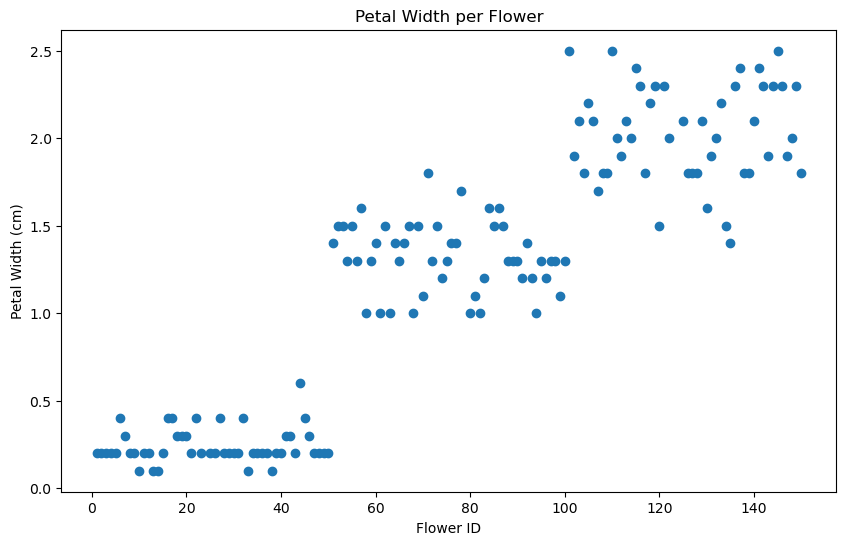

In [58]:
# first, let's create a figure object
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

# define plot
ax.scatter(iris["number"], iris["Petal.Width"])

# add axis and title labels
ax.set_xlabel("Flower ID")
ax.set_ylabel("Petal Width (cm)")
ax.set_title("Petal Width per Flower")

# show figure
plt.show()

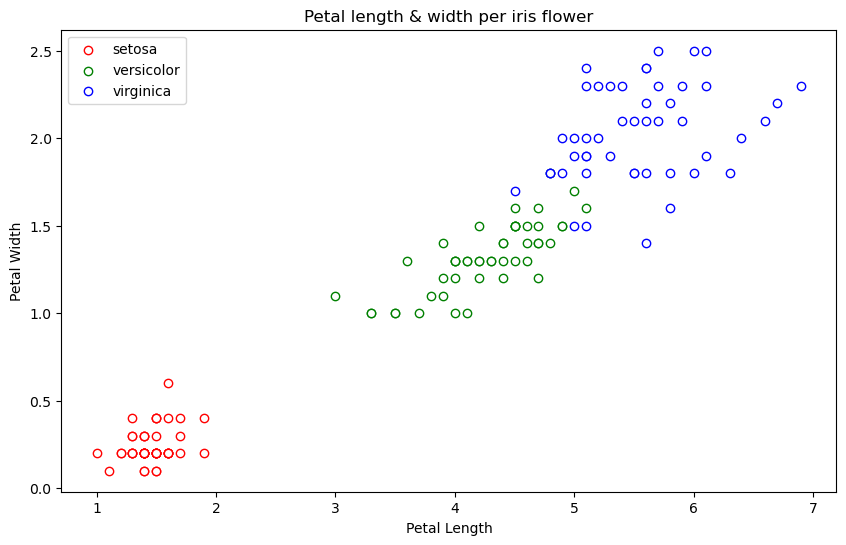

In [59]:
# define species list and corresponding colors
species = list(iris["Species"].unique())
colors = ["r","g","b"]

# create fig object
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))

# iterate over species and plot
for i in range(3):
    x = iris[iris["Species"] == species[i]]["Petal.Length"]
    y = iris[iris["Species"] == species[i]]["Petal.Width"]
    ax.scatter(x,y, c="white", edgecolors=colors[i], marker="o", label=species[i])

# add labels, title and legend
ax.set_xlabel("Petal Length")
ax.set_ylabel("Petal Width")
ax.set_title("Petal length & width per iris flower")
ax.legend()

plt.show()

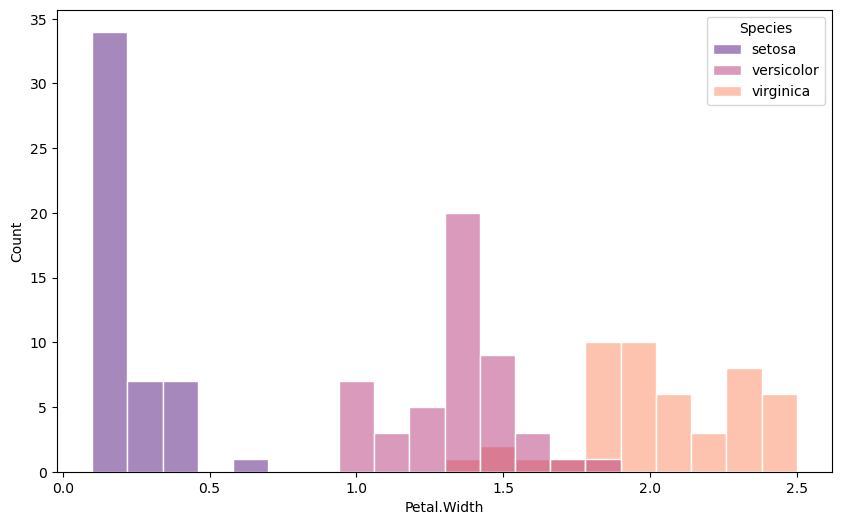

In [4]:
# use seaborn to create histogram
import seaborn as sns
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(10,6))
sns.histplot(data=iris, x="Petal.Width", bins=20, hue="Species", ax=ax, palette="magma", edgecolor="white")
plt.show()

---

## 2. Task: Analyzing speed limit violations in Cologne

Two weeks ago, we really got into hands-on data science using carsharing availability data. Let's put what we learned into practice using data on speed limit violations from August 2022 (the provided datasets are based on this publicly available dataset accessible via [this link](https://offenedaten-koeln.de/dataset/geschwindigkeitsueberwachung-koeln)). The following information are available:
- *date*: date of the violation
- *time*: time of the violation 
- *speed*: speed in km/h
- *excess_speed*: speed above the allowed speed limit in km/h
- *location_id*: identifier of the speed control location

Additionally, we have a dataset with further information on the speed control, including:
- *location_id*: identifier of the speed control location
- *speed_limit*: speed limit in km/h
- *district*: abbreviation for city district of speed control location
- *street*: street name of speed control location

Complete the following steps:
1. Import pandas and load the speeding violations dataset (speeding_cgn_2018_08.csv). Is there missing data? How many violations were there in total during the selected period?
2. Let's properly format the *date* and *time* columns. Combine them into one column and transform them to datetime format. Extract the hour and day of week, and add them as new columns to the dataframe. Hint: make sure that you specify the correct format when transforming to datetime.
3. We want to add the information on the speed control locations contained in *control_locations.csv*. We only want to analyze those violations at control locations for which we have data in control_locations.csv. Load *control_locations.csv* and perform the appropriate merge, so that all relevant information are in one dataframe. Hint: think about the correct setting for the how-parameter in merge.
4. Create two plots: first, show boxplots of the number of speeding violations by day of week. Second, show boxplots of the number of speeding violations by hour of day.

Feel free to use your knowledge to conduct further analyses on the dataset!

In [61]:
import pandas as pd

violations = pd.read_csv("speeding_cgn_2018_08.csv")

violations.head()

,date,time,speed,excess_speed,location_id
0,01/08/22,00:00:50,41,8,1097
1,01/08/22,00:03:42,64,11,1781
2,01/08/22,00:03:49,63,10,7
3,01/08/22,00:04:48,74,11,5
4,01/08/22,00:06:33,61,8,1781


In [62]:
# check: no missing data
violations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57014 entries, 0 to 57013
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          57014 non-null  object
 1   time          57014 non-null  object
 2   speed         57014 non-null  int64 
 3   excess_speed  57014 non-null  int64 
 4   location_id   57014 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 2.2+ MB


In [63]:
# number of total violations
print("There were {} total speeding violations in August 2022.".format(len(violations)))

There were 57014 total speeding violations in August 2022.


In [64]:
# combine date and time into one column
violations["timestamp"] = violations["date"].astype(str) + " " + violations["time"]

# transform timestamp into datetime format
violations["timestamp"] = pd.to_datetime(violations["timestamp"], format="%d/%m/%y %H:%M:%S")

# extract hour and day of week
violations["hour"] = violations["timestamp"].dt.hour
violations["weekday"] = violations["timestamp"].dt.weekday

violations.head()

,date,time,speed,excess_speed,location_id,timestamp,hour,weekday
0,01/08/22,00:00:50,41,8,1097,2022-08-01 00:00:50,0,0
1,01/08/22,00:03:42,64,11,1781,2022-08-01 00:03:42,0,0
2,01/08/22,00:03:49,63,10,7,2022-08-01 00:03:49,0,0
3,01/08/22,00:04:48,74,11,5,2022-08-01 00:04:48,0,0
4,01/08/22,00:06:33,61,8,1781,2022-08-01 00:06:33,0,0


In [65]:
# load control_locations.csv
locations = pd.read_csv("control_locations.csv")

# merge
violations_merged = violations.merge(locations, on="location_id", how="inner")

violations_merged.head()

,date,time,speed,excess_speed,location_id,timestamp,hour,weekday,speed_limit,district,street
0,01/08/22,00:03:49,63,10,7,2022-08-01 00:03:49,0,0,50,07 Innere Kanalstraße,Höhe Escher Straße / Hornstr.
1,01/08/22,00:04:48,74,11,5,2022-08-01 00:04:48,0,0,60,05 Zoobrücke,Höhe Amsterdamer Straße
2,01/08/22,00:10:00,72,9,972,2022-08-01 00:10:00,0,0,60,"972 BAB 1, km 407,075 (MQ1)",Rheinbrücke in Höhe Rheinauen
3,01/08/22,00:10:49,86,23,972,2022-08-01 00:10:49,0,0,60,"972 BAB 1, km 407,075 (MQ1)",Rheinbrücke in Höhe Rheinauen
4,01/08/22,00:12:10,41,8,60,2022-08-01 00:12:10,0,0,30,60 Neustadt/Nord,Kaiser-Wilhelm-Ring 17-21


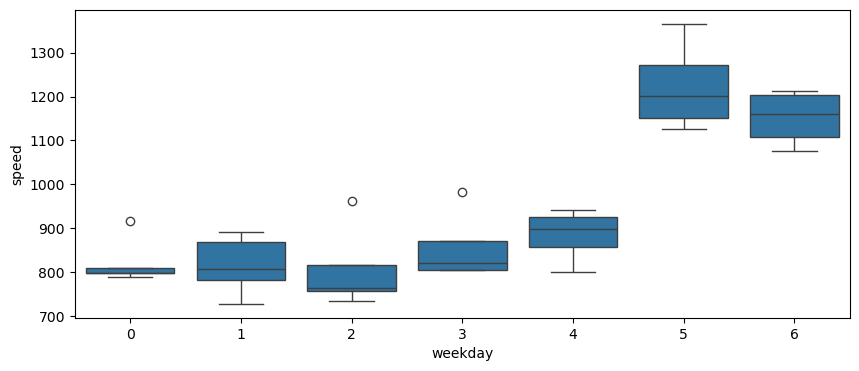

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# violations by day of week
## group data
violations_weekday = violations_merged.groupby(["date","weekday"]).count()

## plot
fig,ax = plt.subplots(figsize=(10,4)) 
sns.boxplot(x=violations_weekday.index.get_level_values(1), y=violations_weekday["speed"],ax=ax)
plt.show()

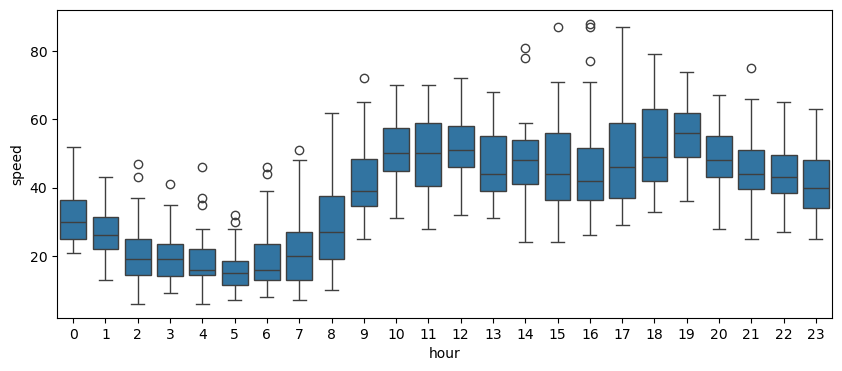

In [67]:
# violations by hour of day
## group data
violations_hour = violations_merged.groupby(["date","hour"]).count()

## plot
fig,ax = plt.subplots(figsize=(10,4)) 
sns.boxplot(x=violations_hour.index.get_level_values(1), y=violations_hour["speed"],ax=ax)
plt.show()

---

## 3. Task: Predicting electricity demand

Last week, we used electricity load data from Pittsburgh to predict peak electricity demand based on temperature. Using the same dataset, put what you have learned together to predict average electricity demand (`AVG`) based on average temperature (`Avg_temp`) **for the summer months (June, July, August)**.

More specifically, do the following:
- Load and prepare the `df_summer` dataframe for analysis.
- Fit a linear regression by using the `scikit-learn` library for average temperature and average demand data.
- Plot the data and fitted line. Annotate your graph appropriately.
- Present relevant test metrics to quantify the __training__ loss.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

df = pd.read_csv("Pittsburgh_load_data.csv")
df["Date"] = pd.to_datetime(df["Date"],format="%d.%m.%Y")
df = df.sort_values("Date")
df["Month"] = df["Date"].apply(lambda dt: dt.month)
summer_month=[6,7,8]
df_summer = df[df["Month"].isin(summer_month)==True]

df_summer.head()

,Date,AVG,MAX,MIN,Total,High_temp,Avg_temp,Month
151,2013-06-01,1.946586,2.298662,0.001947,46.722317,29.4,24.79,6
152,2013-06-02,1.787233,2.026075,0.001787,42.897404,26.7,23.46,6
153,2013-06-03,1.664323,1.832544,0.001664,39.947248,20.6,17.11,6
154,2013-06-04,1.581505,1.827014,0.001582,37.959541,22.2,15.40,6
155,2013-06-05,1.736095,2.109310,0.001736,41.670127,26.7,19.91,6


In [73]:
# define target and feature vectors
Xavg = np.array(df_summer["Avg_temp"]).reshape(-1,1)
yavg = np.array(df_summer["AVG"])

# initialize linear model
lin_model = LinearRegression()

# fit model
lin_model.fit(Xavg,yavg)

# predict training data
y_pred_avg = lin_model.predict(Xavg)

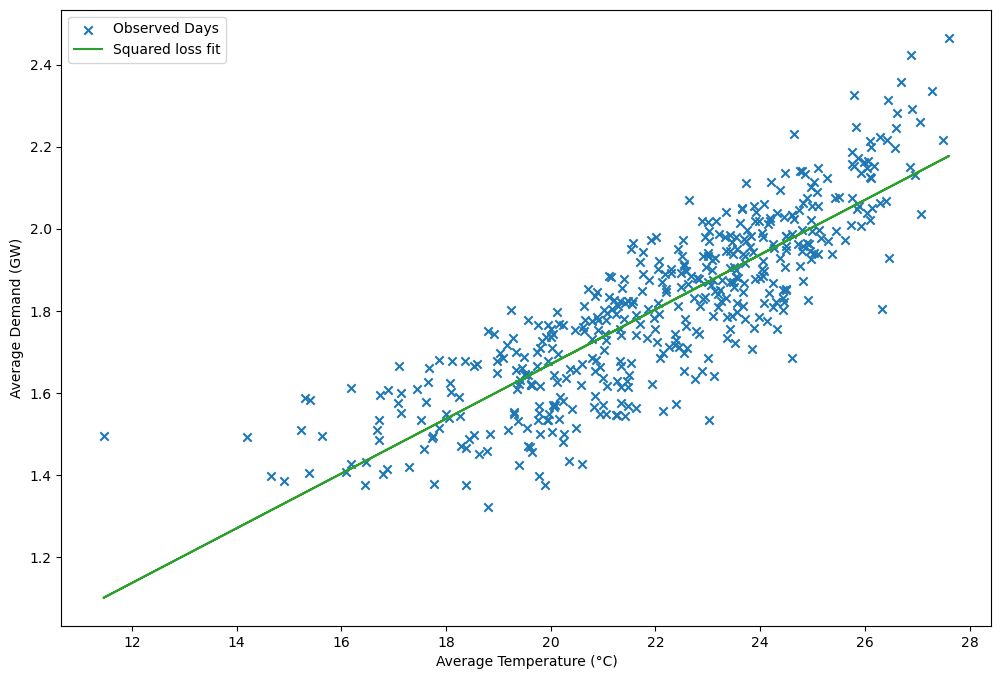

In [74]:
plt.figure(figsize = (12,8))

plt.scatter(Xavg, yavg, marker="x", label='Observed Days')
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Average Demand (GW)")

plt.plot(Xavg, y_pred_avg, c='C2', label='Squared loss fit')

xlim, ylim =(plt.gca().get_xlim(), plt.gca().get_ylim())
plt.xlim(xlim)
plt.ylim(ylim)
plt.legend()
plt.show()

In [72]:
# present test_metrics
print("Mean Absolute Error:",mean_absolute_error(yavg, y_pred_avg),"GW")
print("Root Mean Squared Error:",mean_squared_error(yavg, y_pred_avg)**0.5,"GW")
print("Coefficient of determination:",r2_score(yavg, y_pred_avg))

Mean Absolute Error: 0.09209366431417634 GW
Root Mean Squared Error: 0.1134192200593479 GW
Coefficient of determination: 0.7210023935028126


---

## 4. Task: Introduction to advanced regression

This week, we will continue our regression journey and consider some more complex modeling techniques.

Let's once again use the familiar tips dataset from Seaborn. Execute the following cell to load the dataset.

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


During the introductory task to linear regression, we manually constructed a regression line to predict the tip based on the total bill using the following simple linear model:
\begin{equation}
\mathrm{tip} \approx \theta_1 \cdot \mathrm{total\_bill} + \theta_2
\end{equation}
where $\theta_1$ is the slope of the line and $\theta_2$ is the intercept term.

Implement the linear regression using scikit learn to find the optimal values for the parameters and plot the regression line on top of a scatter plot of the observed values.

In [77]:
# define x and y
X = tips["total_bill"].values.reshape((-1,1))
y = tips["tip"]

# initialize model
lin_mod = LinearRegression()

# train model
lin_mod.fit(X, y)

# make predictions using model
model_pred = lin_mod.predict(X)

# plot results
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker="x")
plt.xlabel("Total bill")
plt.ylabel("Tip")
plt.plot(X, model_pred, c='C2')
plt.legend(['Observed values', 'Squared loss fit'])
print(lin_mod.coef_, lin_mod.intercept_)

[0.10502452] 0.9202696135546731


One obvious way to improve our predictions would be to add another feature. For example, are tips different when people eat for lunch compared to dinner? Add the `time` feature to your regression by doing the following:
- Recode the `time` feature so that "Lunch" is 0 and "Dinner" is 1.
- Define your feature matrix `X` to include both `total_bill` and `time_recoded`.
- Re-run your linear regression.
- Plot a scatter plot with the observed lunch tips and dinner tips in different colors, as well as the respective regression lines.

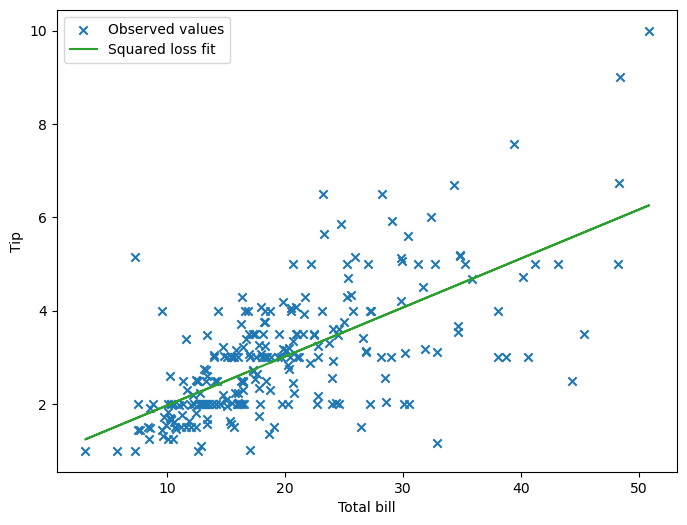

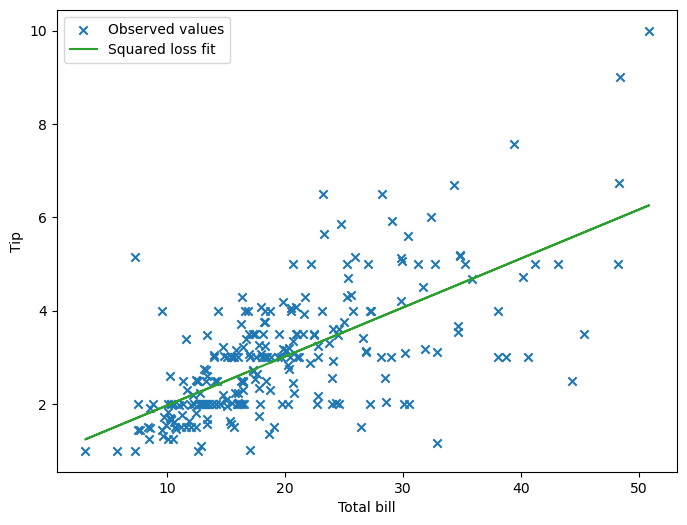

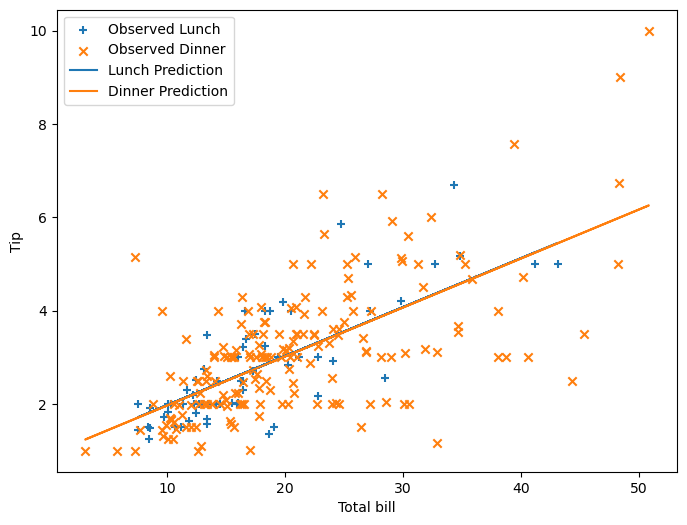

In [78]:
# recode time feature
tips["time_recoded"] = tips["time"].map({"Lunch":0, "Dinner":1})

# define X
X_2D = tips[["total_bill", "time_recoded"]]

# re-run regression
lin_mod_2D = LinearRegression()
lin_mod_2D.fit(X_2D, y)

# create two feature vectors for lunch and dinner
X_lunch = X_2D[X_2D["time_recoded"]==0]
X_dinner = X_2D[X_2D["time_recoded"]==1]

# predict lunch and dinner separately (using the same model!)
y_pred_lunch = lin_mod_2D.predict(X_lunch)
y_pred_dinner = lin_mod_2D.predict(X_dinner)

plt.figure(figsize = (8,6))

plt.scatter(X_lunch["total_bill"], 
            tips[tips["time_recoded"]==0]["tip"], 
            marker="+", label="Observed Lunch")

plt.scatter(X_dinner["total_bill"], 
            tips[tips["time_recoded"]==1]["tip"], 
            marker="x", label="Observed Dinner")

plt.plot(X_lunch["total_bill"], 
         y_pred_lunch, 
         label="Lunch Prediction")

plt.plot(X_dinner["total_bill"], 
         y_pred_dinner, 
         label="Dinner Prediction")

plt.xlabel("Total bill")
plt.ylabel("Tip")

plt.legend()
plt.show()

---

## 5. Using multiple features in a linear regression

In [80]:
# load needed libraries for workshop
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import datetime

%matplotlib inline

### Recap from last workshop: predicting peak electrical power

We will again work with our electrical power example from last week, which we retrieved from PJM via the following link [here](https://dataminer2.pjm.com/feed/hrl_load_metered/definition). The files we are loading are the raw files we downloaded from this source. The final input data for our code is `Pittsburgh_load_data.csv`.

In [81]:
df = pd.read_csv("Pittsburgh_load_data.csv")
df["Date"] = pd.to_datetime(df["Date"], format="%d.%m.%Y")
df["Month"] = df["Date"].apply(lambda x: x.month)
df.head()

,Date,AVG,MAX,MIN,Total,High_temp,Avg_temp,Month
0,2013-01-01,1.598524,1.859947,0.001599,38.368031,0.0,-1.68,1
1,2013-01-02,1.809347,2.054215,0.001809,43.428194,-3.9,-6.58,1
2,2013-01-03,1.832822,2.049550,0.001833,43.991607,0.6,-6.12,1
3,2013-01-04,1.812699,2.008168,0.001813,43.508609,0.0,-1.95,1
4,2013-01-05,1.662036,1.838251,0.001662,39.892360,1.7,-1.47,1


**Recall from last week's workshop**: We fitted a linear model to the summer period of our electricity data. To do so, we used `scikit learn` and obtained the following result:

In [82]:
# limit to summer month
df_summer = df[(df["Month"] > 5) & (df["Month"] < 9)]

In [83]:
X = df_summer["High_temp"].values.reshape((-1,1)) # remember: if we pass a 1-feature array we need to re-shape it!
y = df_summer["MAX"]

In [84]:
# initialize model
lin_mod = LinearRegression()

# train model
lin_mod.fit(X, y)

# make predictions using model
model_pred = lin_mod.predict(X)

# plot results
plt.figure(figsize = (8,6))
plt.scatter(X, y, marker="x")
plt.xlabel("High Temperature (°C)")
plt.ylabel("Peak Demand (GW)")
plt.plot(X, model_pred, c='C2')
plt.legend(['Observed days', 'Squared loss fit'])
print(lin_mod.coef_, lin_mod.intercept_)

[0.08385936] -0.08024740699314936


### Multi-dimensional linear regression

How do we now incorporate multiple features into our model? Essentially, all we need to do is to pass a larger feature vector to our model. 

To see this, let us again consider the example of electricity demand. We expect consumption behavior to be different on weekends compared to working days. **Can you think of the key reasons why this might be the case?**

Let us create a boolean indicator feature entitled `IsWeekday` that returns True if the day is a weekday and False if it falls on a weekend.

In [85]:
# remember the features of our df_summer dataframe
df_summer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 459 entries, 151 to 1702
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       459 non-null    datetime64[ns]
 1   AVG        459 non-null    float64       
 2   MAX        459 non-null    float64       
 3   MIN        459 non-null    float64       
 4   Total      459 non-null    float64       
 5   High_temp  459 non-null    float64       
 6   Avg_temp   459 non-null    float64       
 7   Month      459 non-null    int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 32.3 KB


In [86]:
# add a weekday column to our data frame
df_summer["Weekday"] = df_summer["Date"].apply(lambda dt: dt.weekday())

# create IsWeekday feature
df_summer["IsWeekday"] = df_summer["Weekday"].apply(lambda x: 1 if x<=4 else 0)

# inspect dataframe
df_summer.head(10)

,Date,AVG,MAX,MIN,Total,High_temp,Avg_temp,Month,Weekday,IsWeekday
151,2013-06-01,1.946586,2.298662,0.001947,46.722317,29.4,24.79,6,5,0
152,2013-06-02,1.787233,2.026075,0.001787,42.897404,26.7,23.46,6,6,0
153,2013-06-03,1.664323,1.832544,0.001664,39.947248,20.6,17.11,6,0,1
154,2013-06-04,1.581505,1.827014,0.001582,37.959541,22.2,15.40,6,1,1
155,2013-06-05,1.736095,2.109310,0.001736,41.670127,26.7,19.91,6,2,1
156,2013-06-06,1.734597,1.923417,0.001735,41.633988,21.7,19.28,6,3,1
157,2013-06-07,1.595062,1.799999,0.001595,38.284876,18.9,16.73,6,4,1
158,2013-06-08,1.415416,1.568676,0.001415,33.972964,21.1,16.87,6,5,0
159,2013-06-09,1.549465,1.915678,0.001549,37.190627,27.2,20.94,6,6,0
160,2013-06-10,1.812117,2.072227,0.001812,43.494687,23.9,21.28,6,0,1


In [87]:
# alternatively, you could also define you own function

def weekday_check (dt):
    
    day_number = dt.weekday()
    
    if day_number <=4:
        return 1
    else:
        return 0

#df_summer["IsWeekday"] = df_summer["Date"].apply(lambda dt: weekday_check(dt))

Let us plot the results (this time using seaborn for convenience).

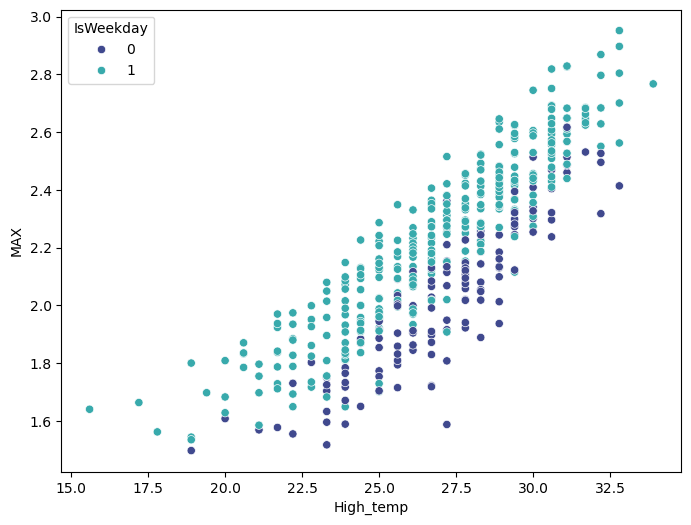

In [89]:
plt.figure(figsize = (8,6))

sns.scatterplot(x=df_summer["High_temp"], y=df_summer["MAX"],hue=df_summer["IsWeekday"], palette="mako")
plt.show()

What do you observe? Is this in line with you expectation?

Let us now train a new linear model with an additional feature for weekdays. As mentioned, all we need to do is to pass a larger feature vector to our linear model.

In [91]:
df_summer.head()

,Date,AVG,MAX,MIN,Total,High_temp,Avg_temp,Month,Weekday,IsWeekday
151,2013-06-01,1.946586,2.298662,0.001947,46.722317,29.4,24.79,6,5,0
152,2013-06-02,1.787233,2.026075,0.001787,42.897404,26.7,23.46,6,6,0
153,2013-06-03,1.664323,1.832544,0.001664,39.947248,20.6,17.11,6,0,1
154,2013-06-04,1.581505,1.827014,0.001582,37.959541,22.2,15.40,6,1,1
155,2013-06-05,1.736095,2.109310,0.001736,41.670127,26.7,19.91,6,2,1


In [90]:
X = df_summer[["High_temp", "IsWeekday"]] # remember: since we now have more than one dimension, we do not need to reshape
y = df_summer[["MAX"]]
lin_mod_day = LinearRegression()
lin_mod_day.fit(X,y)
print(lin_mod_day.coef_, lin_mod_day.intercept_)

[[0.08541718 0.22431882]] [-0.28201097]


**Question:** Note that we have now added a second element to our coefficient vector. Can you interpret the results?

Again, let us plot the results.

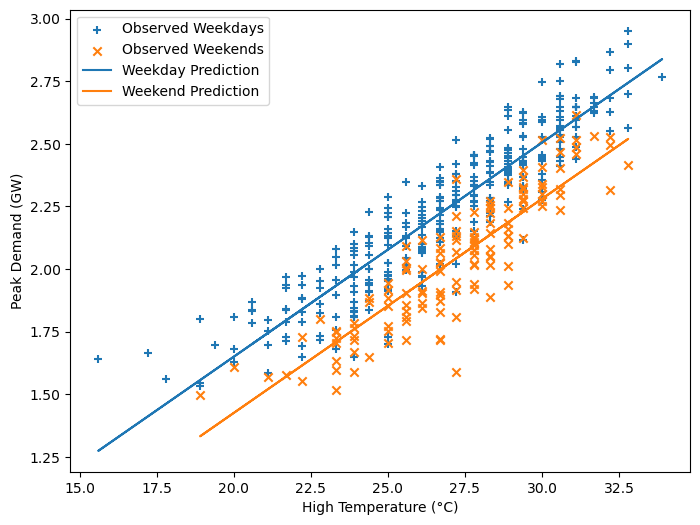

In [92]:
# create two feature vectors for weekdays and weekends
X_weekday = X[X["IsWeekday"]==1]
X_weekend = X[X["IsWeekday"]==0]

# predict weekdays and weekends separately (using the same model!)
y_pred_weekday = lin_mod_day.predict(X_weekday)
y_pred_weekend = lin_mod_day.predict(X_weekend)

plt.figure(figsize = (8,6))

plt.scatter(X_weekday["High_temp"], 
            df_summer[df_summer["IsWeekday"]==1]["MAX"], 
            marker="+", label="Observed Weekdays")

plt.scatter(X_weekend["High_temp"], 
            df_summer[df_summer["IsWeekday"]==0]["MAX"], 
            marker="x", label="Observed Weekends")

plt.plot(X_weekday["High_temp"], 
         y_pred_weekday, 
         label="Weekday Prediction")

plt.plot(X_weekend["High_temp"], 
         y_pred_weekend, 
         label="Weekend Prediction")

plt.xlabel("High Temperature (°C)")
plt.ylabel("Peak Demand (GW)")

plt.legend()
plt.show()

How has the inclusion of an additional feature improved training performance? Let's look at MAE, RMSE and $R^2$ of both model setups.

**Caution**: This is the training error! Do not confuse it with actual model predictive performance, which can only be evaluated on unseen data!

In [93]:
# define y_true, X_1d as the reshaped x vector containing High_temp, and X2_d containing both High_temp and IsWeekday
y_true = df_summer["MAX"]
X_1d = df_summer["High_temp"].values.reshape((-1,1)) # need to reshape 1d vector
X_2d = df_summer[["High_temp","IsWeekday"]]

# make predictions using the fitted models (lin_mod for 1d and lin_mod_day for 2d)
y_pred_1d = lin_mod.predict(X_1d)
y_pred_2d = lin_mod_day.predict(X_2d)

# print results
print("MAE 1D:", mean_absolute_error(y_true,y_pred_1d))
print("MAE 2D:", mean_absolute_error(y_true,y_pred_2d))

print("RMSE 1D:", mean_squared_error(y_true,y_pred_1d)**0.5)
print("RMSE 2D:", mean_squared_error(y_true,y_pred_2d)**0.5)

print("R2 1D:", r2_score(y_true, y_pred_1d))
print("R2 2D:", r2_score(y_true,y_pred_2d))

MAE 1D: 0.1259610051963046
MAE 2D: 0.09542776362321943
RMSE 1D: 0.1567504679751341
RMSE 2D: 0.1195172899949024
R2 1D: 0.7301181597178452
R2 2D: 0.8431019864973227


---

## 6. Non-linear modeling (polynomial regression)

The relationship between high temperature and electrical demand is well-modeled by a linear function during the summer months, when (at least in Pittsburgh), electricity is dominated by air conditioners (so that with higher temperatures comes higher consumption). 

However, this is clearly not the case for the entire year. Indeed, if our previous linear model is believed to be applicable in general, then with lower temperatures we would continue to have lower and lower consumption (until, at some point, we’d start generating electricity). Naturally, this is not the case, and if we instead consider the entire year of high temperature and peak demand, or average temperature and average demand, then a different picture emerges.

Let us define the following notation:

- xp = High temperature 
- yp = Peak demand 
- xa = Average temperature 
- ya = Average demand

In [94]:
# note that we now use the full data (not just summer)
xp = df["High_temp"].values
yp = df["MAX"].values
xa = df["Avg_temp"].values
ya = df["AVG"].values

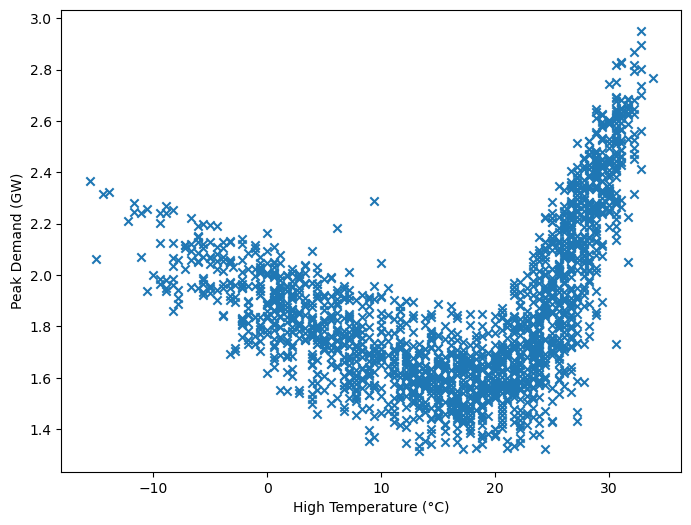

In [96]:
plt.figure(figsize = (8,6))
plt.scatter(xp, yp, marker="x")
plt.xlabel("High Temperature (°C)")
plt.ylabel("Peak Demand (GW)")
plt.show()

The plotted data looks more like we would expect. Although peak demand increases sharply with temperature after a high temperature of 22 degrees or so (precisely the range when air conditioning usually starts), below this the demand actually starts to increase with lower temperature – though not with as steep a slope, due to the fact that, for example, most heating in Pittsburgh is done with gas rather than with electricity, and other loads that increase with lower temperatures tend to be smaller in magnitude than air conditioning units.

### Linear regression
If we were to fit a linear model to this data, it would look like the following:

In [97]:
# initialize, fit and predict
lr = LinearRegression()
lr.fit(xp.reshape(-1,1), yp)
model_pred_p = lr.predict(xp.reshape(-1,1))

# plot figure
plt.figure(figsize = (8,6))
plt.scatter(xp, yp, marker="x" )
plt.xlabel("High Temperature (°C)")
plt.ylabel("Peak Demand (GW)")
plt.plot(xp, model_pred_p, c='C2')
print ('The R^2 of linear regression is: ', r2_score(y_true = yp, y_pred = model_pred_p))

The R^2 of linear regression is:  0.09387669129560838


### Polynomial regression (quadratic)
To capture data of this type, we clearly want some way of expressing nonlinear relationships in the data.  Fortunately, this is possible without actually leaving the domain of so-called "linear regression".  The trick we are going to use is a simple one: rather than have features $x^{(i)}$ which only include the "raw" inputs such as temperature (plus other raw inputs such as weekday indicators that we saw previously), we are going to build features that include _nonlinear_ functions of the underlying inputs. For example, we could choose the following features
\begin{equation}
x^{(i)} = \left [ \begin{array}{c} (\mathrm{HighTemperature}^{(i)})^2 \\
\mathrm{HighTemperature}^{(i)} \\ 1 \end{array} \right ]
\end{equation}
which also include a quadratic function of the high temperature variable. If we choose this representation, then our linear hypothesis function $h_\theta(x) = \theta^Tx$ is now given by
\begin{equation}
h_\theta(x) = \theta_1 (\mathrm{HighTemperature}^{(i)})^2 + \theta_2 \mathrm{HighTemperature}^{(i)} + \theta_3
\end{equation}
which is a _quadratic_ function of the high temperature.  Importantly, however, the hypothesis function is still a linear function of the parameters, and so the exact same solution methods work as before (including the exact solution), just by passing a different feature matrix.

Let us first do this by hand. We define a simple function entitled `plot_regression_poly` that takes features, target and the degree of the polynomial as input.

In this setting we're actually going to standardize features to the range $[-1,+1]$ even with the least-squares analytical solution for numerical reasons.  High polynomials get very large very quickly, and if we aren't careful it's easy to overload the range of double precision floating point values.

To standardize to the range $[-1,+1]$ we use the following formula: 
\begin{equation}
2*\frac{x - min(x)}{max(x) - min(x)}-1
\end{equation}

In [34]:
# x is the input variable
# y is the output variable
# d is degree of polynomial regression

def plot_regression_poly(x, y, d):
    
    # create polynomial features
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T # start at highest polynomial degree (d) and go backwards until 0 in steps of 1
    
    # implement polynomial regression using least squares (we use the normal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    
    # create scaled test dataset
    xt0 = np.linspace(min_x-1, max_x+1, 400) # generate equally spaced x values in the x range
    xt = 2 * (xt0 - min_x)/(max_x - min_x) -1 # standardize to range [-1,1]
    Xt = np.array([xt**i for i in range(d,-1,-1)]).T # generate polynomial features
    yt = Xt @ theta # generate predicted y values
    
    # plot results
    plt.figure(figsize = (8,6))
    plt.scatter(x, y, marker="x")
    ylim = plt.ylim()
    plt.plot(xt0, yt, 'C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([min_x-2, max_x+2])
    plt.ylim(ylim)
    print(theta[:7]) # print first 7 thetas

In [35]:
plot_regression_poly(x = xp, y=yp, d = 2)

[ 1.19800453 -0.19250338  1.58898561]


This looks better, but a quadratic function is symmetric around its minimum point, and the data we're trying to fit is definitely not symmetric. Thus, we may want a cubic function.

### Polynomial regression (cubic)

In [36]:
# plot of Peak demand vs. High temperature with cubic polynomial regression
plot_regression_poly(x = xp, y=yp, d = 3)

[ 1.11163335  0.81686774 -0.59852881  1.64885721]


This does not look bad. Let's keep going:

In [37]:
# try some other values for d --> What seems to be a good one?
plot_regression_poly(x = xp, y=yp, d = 5)

[-0.75717174  0.6052924   1.66483831  0.42155216 -0.65742564  1.67658979]


How about a 100-degree polynomial? Is this something we want? Also, what do you think about the value of the coefficients?

In [38]:
plot_regression_poly(x = xp, y=yp, d = 100)

[ -969759.0631536  -2383810.89024801  1145312.32713517  1760055.66041229
  -830932.89545394  -234924.33803376   812547.11753405]


As you can see, something very bad has happened at this point. Especially at the tail ends of the data, where the data points are spaced less closely, we start to get very odd patterns for the data. But the important point is that this is actually a very good fit to the data from a least-squares perspective. As you can see from the figure, the line passes exactly through many of the data point (most obvious on the left hand side of the plot), whereas for the "better" fits we had above, our function didn't pass exactly through those points, so actually suffered more loss. But there is an obvious way in which the degree 100 polynomial fit, despite having lower loss, is actually a worse approximation to the underlying data. This brings us to the second topic of these notes, which is the issue of generalization and overfitting.

We will see shortly how we manage these situations, but let us first implement the above example using `scikit learn`. Essentially, all we need to do is to pre-process our feature vector and create polynomial features. To do so, we use a built-in module called `PolynomialFeatures`.

In [39]:
from sklearn.preprocessing import PolynomialFeatures

Let us first consider a toy example to understand how this module works

In [40]:
Q = np.array([[2,3,4], [5,6,7]]).T # let's assume we have two features

# initialize PolynomialFeatures
PF = PolynomialFeatures(degree = 2,interaction_only = False, include_bias = True)
Q_Poly = PF.fit_transform(Q)
print(Q)
print(Q_Poly)

[[2 5]
 [3 6]
 [4 7]]
[[ 1.  2.  5.  4. 10. 25.]
 [ 1.  3.  6.  9. 18. 36.]
 [ 1.  4.  7. 16. 28. 49.]]


**Note**: This will generate a new feature matrix consisting of all polynomial combinations
of the features with degree less than or equal to the specified degree. For example, if an input sample is two dimensional and of the form [a, b], the degree-2 polynomial features are [1, a, b, a^2, ab, b^2]. This is slightly different from what we have done manually above but is a more common way of creating polynomial features.

In [41]:
def plot_regression_poly_scikit(X,Y,d):
    
    # initialize PolynomialFeatures
    poly_reg = PolynomialFeatures(degree = d)
    
    # polynomial transformation
    x_poly = poly_reg.fit_transform(X.reshape(-1,1))
    
    # fitting linear regression to polynomial features
    lin_reg_Poly = LinearRegression()
    lin_reg_Poly.fit(x_poly, Y)
    model_pred = lin_reg_Poly.predict(x_poly)
    
    # plotting the regression line and the data (we have to transform the inputs as well!)
    x_fit = np.arange(X.min(), X.max(), 1)
    x_fit_poly = poly_reg.fit_transform(x_fit.reshape(-1,1))
    y_pred = lin_reg_Poly.predict(x_fit_poly)
    
    plt.figure(figsize = (8,6))
    plt.scatter(X,Y,marker="x", c='C2')
    ylim = plt.ylim()
    plt.plot(x_fit,y_pred, c='C1')
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Demand (GW)")
    plt.xlim([X.min()-2,X.max()+2]) # leave some space before and after limits
    plt.ylim(ylim)
    print ('The R^2 for quadratic curve is: ',r2_score(Y, model_pred))
    #print(lin_reg_Poly.coef_)

In [42]:
plot_regression_poly_scikit(X = xp, Y = yp, d = 8)

The R^2 for quadratic curve is:  0.7531939793344752


---

## 7. Overfitting & cross-validation

Recall from our previous discussions that the canonical machine learning problem that we solve with every algorithm is the following
\begin{equation}
\underset{\theta}{minimize} \; \frac{1}{m}\sum_{i=1}^m \ell \left(h_\theta(x^{(i)}),y^{(i)} \right)
\end{equation}
i.e., to minimize the sum of losses on the data set. However, in a more fundamental way, this is not really our goal.  We ultimately do not care about achieving low loss specifically on the points that we are feeding into the algorithm: we already _know_ the true output for each of these data points, and if we want to "predict" these points precisely, we could just look up each point in a database (assuming we have some way of referring to the points uniquely).  What we _really_ want from a machine learning algorithm is the ability to predict _new_ data points _of the same type_ as those we trained our model on.  We don't care about knowing what the peak demand _was_ on previous days we have already seen; we care about being able to predict what the peak demand _will be_ tomorrow given the high temperature as input.

**Generalization error** 

This discussion leads us to the notion of _generalization error_.  Informally, the generalization error is just the error (or more generally, the loss) we would experience not on the training data itself, but on new data drawn from the "same distribution" as the training data. _This_ is really the quantity we want to minimize, not the error on the training data itself. Because when we run our machine learning algorithm on new data, all that will matter is its generalization performance.

What the above example illustrated was an instance of _overfitting_, the situation where the training error is low, but the generalization error is high.  This occurs because we are explicitly trying to minimize the loss on the training set, and if the expressiveness of a hypothesis function is small enough, then we can make this loss arbitrarily small, usually by fitting to pecularities in the training data that provide no real benefit when looking at new data.

**Overfitting and model complexity**

In general, we expect something like the following behavior when it comes to overfitting.  We're showing the "cartoon" form here but we will shortly see what this looks like in practice.

![Cartoon illustration of overfitting](overfitting.svg)

When model complexity is low, both training and generalization loss are high (here, model complexity can mean any type of representational power of the model, but since we have covered this so far, you can think of it just as the degree of the polynomial in our feature vector).  As we increase model complexity (i.e. add polynomial degrees), then both training and generalization loss start to decrease with training loss usually slightly lower than generalization loss (due to the simple fact that we explicitly optimize training loss).  As we futher increase model complexity, training loss will continue to only decrease: by adding additional representational power to our model, we will only fit the data better and better, since we are explicitly choosing parameters to minimize this loss.  But at a certain point, generalization loss will start to increase again. Our goal when choosing the "right" model for a particular machine learning problem is to find the model with lowest generalization error, the minimum of the red line above. However, we cannot do so using the training set alone, because performance on the training set (the blue line) gives us no clue about the generalization performance.

### Standard cross validation

The idea of cross validation is simple.  Given the entirety of our training data, we take some fixed percentage, say 70% of the data, and call this our "new" training set.  We then take the remaining data (30% in this case), and call it the _holdout_ or _validation_ set.  The basic idea is that we will use the emprical error or loss on this holdout set as an approximation for the generalization error.  This works because, unlike the training set, we do _not_ choose the parameters of the model based upon the validation set.  This means that there is no way for the parameters to overfit to this data, and thus the validation set provides a reasonable estimate of generalization error even _after_ the parameters have been trained.

Let's see how to generate these training and validation sets.

#### Train-test split by hand

In [43]:
# create an array
X = df["High_temp"]

# create randomly shuffled list of indexes 
np.random.seed(10) # this method is called when RandomState is initialized
perm = np.random.permutation(len(X))

# select first 70% indices of shuffled list as train set
idx_train = perm[:int(len(perm)*0.7)]

# select last 30% indices of shuffled list as holdout set
idx_cv = perm[int(len(perm)*0.7):]

x_train, y_train = df["High_temp"].iloc[idx_train].values, df["MAX"].iloc[idx_train].values
x_cv, y_cv = df["High_temp"].iloc[idx_cv].values, df["MAX"].iloc[idx_cv].values

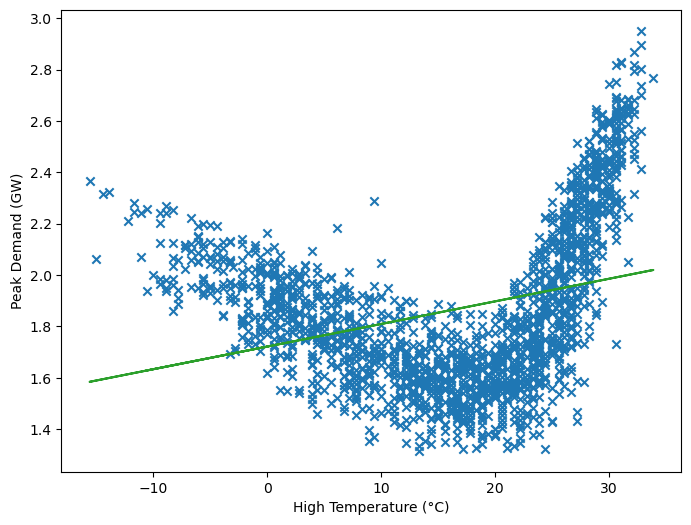

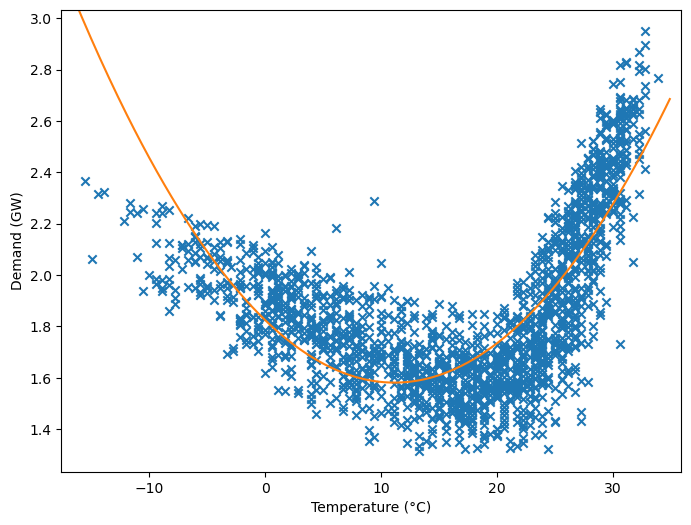

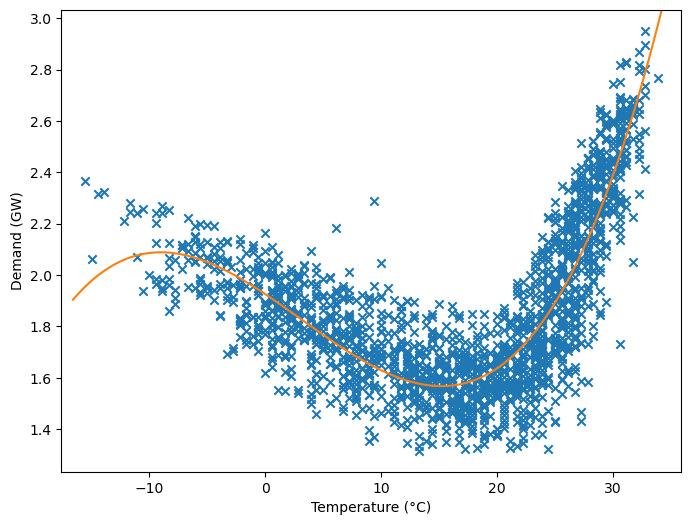

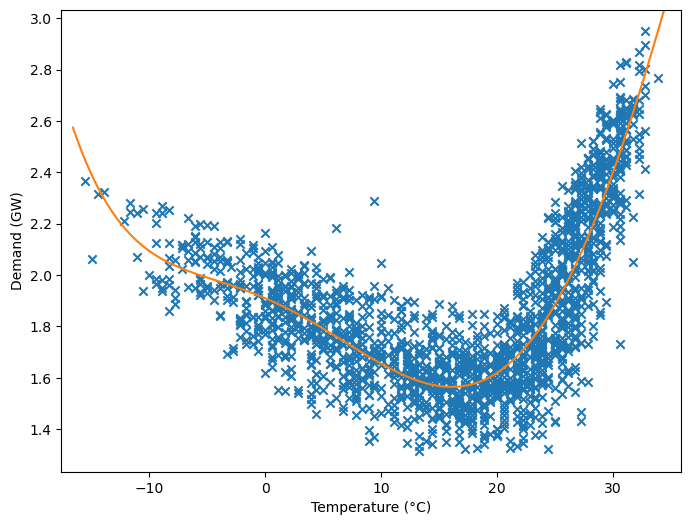

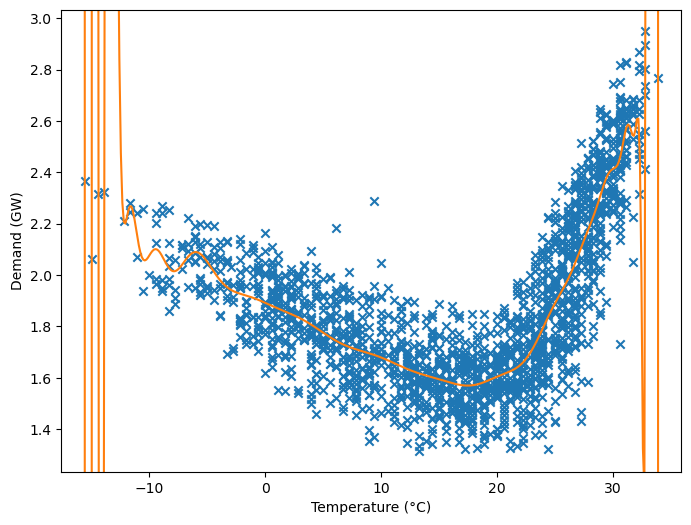

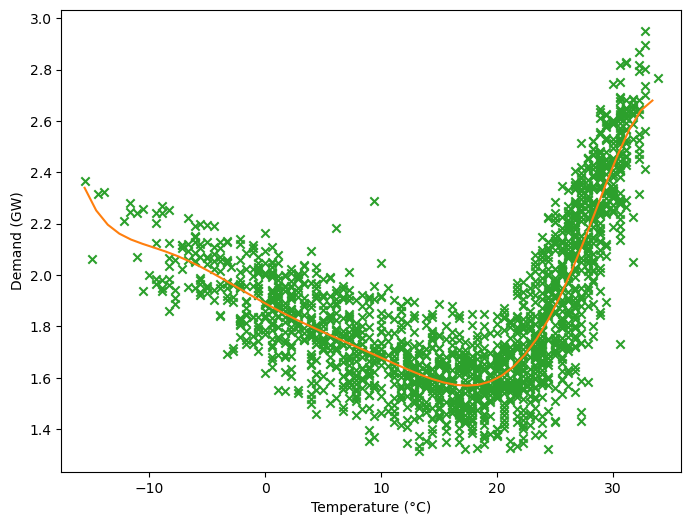

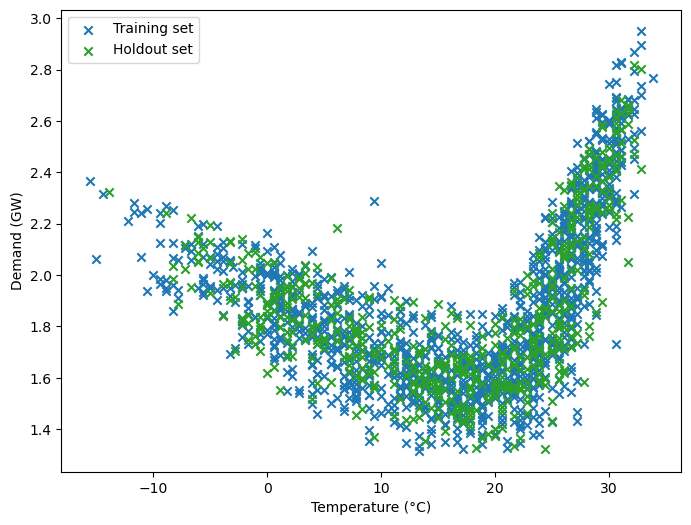

In [44]:
plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train, marker='x', color="C0")
plt.scatter(x_cv, y_cv, marker='x', color="C2")
plt.xlabel("Temperature (°C)")
plt.ylabel("Demand (GW)")
plt.legend(['Training set', 'Holdout set'])
plt.show()
#plt.savefig('crossvalidation.png', dpi = 300)

#### Train-test split with `scikit learn`

We can also make our life easier and use the `train_test_split` in `scikit learn`.

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
# split the data with 70%-30% split as above
x_train, x_test, y_train, y_test = train_test_split(df["High_temp"], df["MAX"], test_size=0.3,random_state=42)

This gives us a very similar random test split (see figure below).

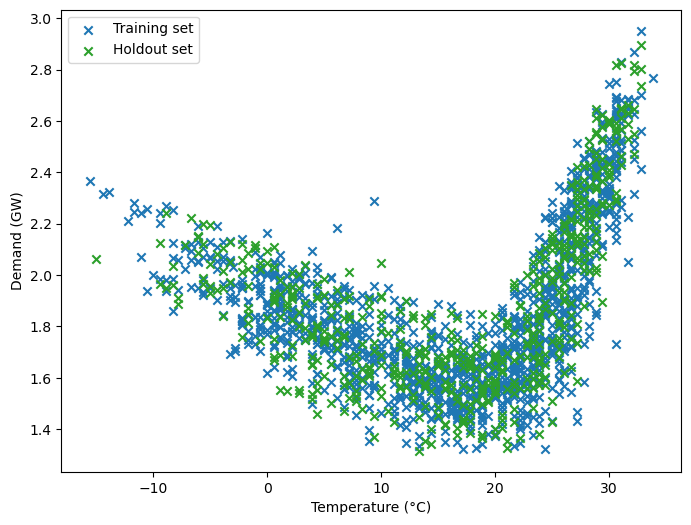

In [47]:
plt.figure(figsize = (8,6))
plt.scatter(x_train, y_train, marker='x', color="C0")
plt.scatter(x_test, y_test, marker='x', color="C2")
plt.xlabel("Temperature (°C)")
plt.ylabel("Demand (GW)")
plt.legend(['Training set', 'Holdout set'])
plt.show()
#plt.savefig('crossvalidation.pdf', dpi = 300)

#### Compare training and validation loss

Let us know generate the schematic training and validation loss plot from above.

In [48]:
# remember our polynomial regression function
def ls_poly(x, y, d): # ls=least squares
    
    # create polynomial features
    min_x, max_x = x.min(), x.max()
    xs = 2*(x - min_x)/(max_x - min_x)-1  # standardize to range [-1,1]
    X = np.array([xs**i for i in range(d,-1,-1)]).T
    
    # implement polynomial regression using least squares (we use the normal equations as derived in the lecture)
    theta = np.linalg.solve(X.T @ X, X.T @ y)
    
    return theta

In [49]:
# define min and max of training set
min_x_train, max_x_train = x_train.min(), x_train.max()

# standardize train and test set based on training set
x_train = 2*(x_train - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(x_test - min_x_train)/(max_x_train - min_x_train) - 1

# create function to generate polynomial feature vector
def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    
# compute training and validation error for different polynomial degrees
err_train = []
err_cv = []
for i in range(50):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())

# plot errors
plt.figure(figsize = (8,6))
plt.semilogy(range(50), err_train, range(50), err_cv)
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Text(0, 0.5, 'Mean squared error')

Let's zoom in on the "good" region...

In [50]:
# same code as above, just change range to 20

# define min and max of training set
min_x_train, max_x_train = x_train.min(), x_train.max()

# standardize train and test set based on training set
x_train = 2*(x_train - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(x_test - min_x_train)/(max_x_train - min_x_train) - 1

# create function to generate polynomial feature vector
def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    
# compute training and validation error for different polynomial degrees
err_train = []
err_cv = []
for i in range(20):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_cv.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())

# plot errors
plt.figure(figsize = (8,6))
plt.semilogy(range(20), err_train, range(20), err_cv)
plt.xticks(range(20))
plt.legend(["Training", "Validation"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Text(0, 0.5, 'Mean squared error')

Using this plot, one can use the so-called "elbow method" to select the appropriate polynomial degree.

### Cross validation using train/holdout/test splits

As we have discussed in last week's lecture, it is advisable to actually do a three-ways split of the dataset to avoid leakage. You would typically do the following:

1. Divide data into training
set, holdout set, and test
set
2. Train algorithm on training
set (i.e., to learn
parameters), use holdout
set to select
hyperparameters
3. (Optional) retrain model
on training + holdout
4. Evaluate performance on
test set

Naturally, as above, we can do the split manually. Here is the code:

In [51]:
# create an array
X = df["High_temp"]

# create randomly shuffled list of indexes 
np.random.seed(10) # This method is called when RandomState is initialized
perm = np.random.permutation(len(X))

# select first 50% indexes of shuffled list as train set
idx_train = perm[:int(len(perm)*0.5)]

# select 20% indexes of shuffled list as holdout set
idx_hold= perm[int(len(perm)*0.5):int(len(perm)*0.7)]

# select last 30% indexes of shuffled list as test set
idx_test= perm[int(len(perm)*0.7):int(len(perm)*1)]

x_train, y_train = df["High_temp"].iloc[idx_train].values, df["MAX"].iloc[idx_train].values
x_hold, y_hold = df["High_temp"].iloc[idx_hold].values, df["MAX"].iloc[idx_hold].values
x_test, y_test = df["High_temp"].iloc[idx_test].values, df["MAX"].iloc[idx_test].values

In [52]:
print(len(x_train),len(x_hold),len(x_test))

912 365 548


But we can do it in `scikit learn` a bit more easily.

In [53]:
# do a 70-30 split first
X_train, X_test, y_train, y_test = train_test_split(xp, yp, test_size=0.3,random_state=34)

# now split X_train to achive 50-20-30 split
X_train, X_hold, y_train, y_hold = train_test_split(X_train, y_train, test_size=(0.2/0.7),random_state=34)

In [54]:
print(len(X_train),len(X_hold),len(X_test))

912 365 548


In [55]:
# again we can plot the errors to compare
min_x_train, max_x_train = X_train.min(), X_train.max()
x_train = 2*(X_train - min_x_train)/(max_x_train - min_x_train) - 1
x_hold = 2*(X_hold - min_x_train)/(max_x_train - min_x_train) - 1
x_test = 2*(X_test - min_x_train)/(max_x_train - min_x_train) - 1

def poly_feat(x, degree):
    return np.array([x**i for i in range(degree,-1,-1)]).T
    
err_train = []
err_hold = []
err_test = []
for i in range(30):
    theta = ls_poly(x_train, y_train, i)
    err_train.append(((poly_feat(x_train,i) @ theta - y_train)**2).mean())
    err_hold.append(((poly_feat(x_hold,i) @ theta - y_hold)**2).mean())
    err_test.append(((poly_feat(x_test,i) @ theta - y_test)**2).mean())
plt.semilogy(range(30), err_train, range(30), err_hold,range(30), err_test)
plt.legend(["Training", "Validation", "Test"])
plt.xlabel("Polynomial degree")
plt.ylabel("Mean squared error")

Text(27.881614244249135, 0.5, 'Mean squared error')

### Further validation techniques

There is a whole range of more or less evolved validation techniques. For most of these, pre-built implementations in scikit learn exist. We refer you to the excellent scikit learn cross validation page for further reading. You can access it [here](https://scikit-learn.org/stable/modules/cross_validation.html). The most important technique to check out is k-fold cross-validation.

---